<div style='background-color: #f0f0f0; padding: 10px; border-radius: 5px; font-family:Georgia; white-space: pre; color: #000000; text-align: center;'>

# <strong>Model selection using ROC and PRC analysis</strong>
</div>

<div style='background-color: #ffffff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>
<h2><strong>Receiver Operating Characteristic (ROC) Curve</strong></h2>
<p>A Receiver Operating Characteristic (ROC) curve is a graphical representation used to evaluate the performance of a binary classification model by plotting the <b>true positive rate</b> (also called recall or sensitivity) against the <b>false positive rate</b> at various threshold settings. The curve provides insight into the trade-off between correctly identifying positive instances and mistakenly classifying negative instances as positive. The area under the ROC curve (AUC) summarizes the overall ability of the model to discriminate between the positive and negative classes, with higher values indicating better performance.</p>
<h2><strong>Precision-Recall Curve (PRC)</strong></h2>
<p>A Precision-Recall Curve (PRC) is a plot that visualizes the relationship between <b>precision</b> (the proportion of predicted positive samples that are actually positive) and <b>recall</b> (the proportion of actual positive samples that are correctly identified) for different threshold values of a binary classifier. Precision-Recall curves are especially useful for evaluating models on imbalanced datasets, where the number of positives is much smaller than the number of negatives. The area under the PRC (sometimes referred to as average precision) gives an overall measure of the model’s effectiveness in identifying the positive class.</p>
</div>

### <strong>Loading the dataset</strong>

<div style='background-color: #ffffff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>
<h3>Description of the dataset</h3>
<p>The dataset used in this analysis is the "Statlog Landsat Satellite" dataset from the UCI Machine Learning Repository. This dataset contains multi-spectral values of pixels in 3x3 neighborhoods in a satellite image, along with a label indicating the type of land cover present in the central pixel. The land cover types include various classes such as water, urban areas, vegetation, and bare soil. The dataset is commonly used for classification tasks in remote sensing and environmental monitoring.</p>

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# setting plot theme
sns.set_theme(context='notebook', style='whitegrid', palette='colorblind')
%matplotlib inline
# importing HTML for display
from IPython.display import HTML, display

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_landsat_satellite = fetch_ucirepo(id=146) 
  
# data (as pandas dataframes) 
X = statlog_landsat_satellite.data.features 
y = statlog_landsat_satellite.data.targets 
  
print(X.head(), y.head()) 


   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0          92         115         120          94          84         102   
1          84         102         106          79          84         102   
2          84         102         102          83          80         102   
3          80         102         102          79          84          94   
4          84          94         102          79          80          94   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute27  \
0         106          79          84          102  ...          134   
1         102          83          80          102  ...          128   
2         102          79          84           94  ...          113   
3         102          79          80           94  ...          104   
4          98          76          80          102  ...          104   

   Attribute28  Attribute29  Attribute30  Attribute31  Attribute32  \
0          104           88       

In [3]:
# unique classes in target variable
print("Unique classes in y:", np.unique(y))
display(HTML("<div style='background-color: #f0f8ff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>"
"<p>The target variable 'y' contains six unique classes representing six different land cover types which are encoded from 1 to 7. " \
"This multi-class nature of the dataset will require appropriate classification algorithms and evaluation metrics that can handle multiple classes effectively.</p></div>"))

Unique classes in y: [1 2 3 4 5 7]


### <strong>EDA and feature preprocessing</strong>

In [4]:
# data info
print(X.info(), y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Attribute1   6435 non-null   int64
 1   Attribute2   6435 non-null   int64
 2   Attribute3   6435 non-null   int64
 3   Attribute4   6435 non-null   int64
 4   Attribute5   6435 non-null   int64
 5   Attribute6   6435 non-null   int64
 6   Attribute7   6435 non-null   int64
 7   Attribute8   6435 non-null   int64
 8   Attribute9   6435 non-null   int64
 9   Attribute10  6435 non-null   int64
 10  Attribute11  6435 non-null   int64
 11  Attribute12  6435 non-null   int64
 12  Attribute13  6435 non-null   int64
 13  Attribute14  6435 non-null   int64
 14  Attribute15  6435 non-null   int64
 15  Attribute16  6435 non-null   int64
 16  Attribute17  6435 non-null   int64
 17  Attribute18  6435 non-null   int64
 18  Attribute19  6435 non-null   int64
 19  Attribute20  6435 non-null   int64
 20  Attribut

In [5]:
# check nullity
print(X.isnull().sum(), y.isnull().sum())

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
Attribute21    0
Attribute22    0
Attribute23    0
Attribute24    0
Attribute25    0
Attribute26    0
Attribute27    0
Attribute28    0
Attribute29    0
Attribute30    0
Attribute31    0
Attribute32    0
Attribute33    0
Attribute34    0
Attribute35    0
Attribute36    0
dtype: int64 class    0
dtype: int64


<div style='background-color:#f0f0f0; padding:10px; border-radius:5px; font-family:Tahoma; color:#000000; text-align:left;'>
There are no missing values in the features or target variable. Therefore, we can proceed with the feature preprocessing.
</div>

In [6]:
# standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.661177,1.372574,1.244208,0.603682,1.095101,0.819608,0.413457,-0.184648,1.120130,0.835806,...,2.094080,1.123729,1.412427,1.656979,1.729516,0.912814,1.139685,1.058116,0.843046,0.235904
1,1.073150,0.804404,0.403097,-0.190128,1.095101,0.819608,0.173402,0.026552,0.823164,0.835806,...,1.732879,0.913090,1.115947,1.044165,0.831474,0.230119,1.139685,0.707472,0.303936,-0.183981
2,1.073150,0.804404,0.162779,0.021555,0.800119,0.819608,0.173402,-0.184648,1.120130,0.485857,...,0.829875,0.228512,1.115947,0.693985,0.292649,-0.190001,1.139685,0.707472,0.303936,-0.183981
3,0.779136,0.804404,0.162779,-0.190128,1.095101,0.470029,0.173402,-0.184648,0.823164,0.485857,...,0.288073,-0.192767,1.115947,0.693985,0.292649,-0.190001,1.139685,0.882794,0.303936,-0.183981
4,1.073150,0.454761,0.162779,-0.190128,0.800119,0.470029,-0.066654,-0.343047,0.823164,0.835806,...,0.288073,-0.192767,1.115947,0.869075,0.292649,-0.190001,0.766566,1.058116,0.603442,0.235904


In [7]:
# splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5148, 36) (1287, 36) (5148, 1) (1287, 1)


<div style='background-color: #ffffff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>
<p> Now that the data has been scaled and split into training and testing sets, we can proceed with building and evaluating classification models using ROC and PRC analysis.</p>
</div>

### <strong>Training models </strong>

#### <em>K-Nearest Neighbors (KNN) Classifier</em>

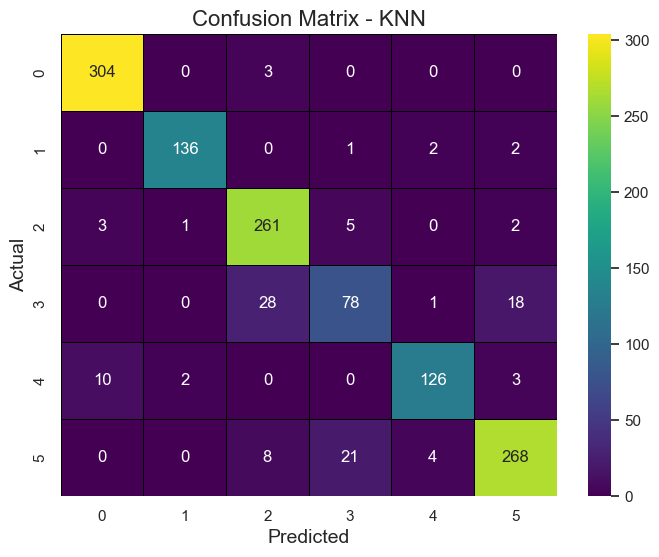

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# raveling y if necessary
y_train = np.asarray(y_train).ravel()
y_test  = np.asarray(y_test).ravel()
# Fit the model on the training data
knn.fit(X_train, y_train)
# Predict on the test data
y_pred = knn.predict(X_test)
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# displaying confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='viridis',
    linewidths=0.5,
    linecolor='black',
)
plt.title('Confusion Matrix - KNN', fontsize=16)
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.show()


In [9]:

# displaying classification report as styled HTML table
class_report_dict = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report_dict).transpose().round(3)

# update CSS to be visually compatible with the viridis colormap (neutral header with good contrast)
css = """
<style>
.dataframe { border-collapse: collapse; font-family: Tahoma, sans-serif; background-color: transparent; color: #000; margin: 0; }
table.dataframe { margin: 0 auto; }  /* center the table */
.dataframe thead th { background-color: #3b4cc0; color: #fff; }
.dataframe th, .dataframe td {border: 1px solid #ddd; white-space: nowrap; font-size: 13px; }
.dataframe tbody tr:hover { background-color: #FFA500; }
.dataframe tbody tr:nth-child(even) { background-color: #fbfcff; }
div[style*="background-color: #f0f8ff"] { padding: 6px !important; margin: 0 !important; }
</style>
"""


# build the html
html = (
    css
    + "<div style='background-color: #f0f8ff; padding: 10px; border-radius: 5px; "
      "font-family: Tahoma; color: #000000; text-align: center;'>"
    + "<h3>Classification Report</h3>"
    + class_report_df.to_html()
    + "</div>"
)

# Enlarge table: set width, increase font-size and add cell padding via inline styles
html = html.replace('<table ', '<table style="width:90%; font-size:16px; border-collapse:collapse;" ')
html = html.replace('<th>', '<th style="padding:10px;">')
html = html.replace('<td>', '<td style="padding:10px;">')

# display the html
display(HTML(html))

,precision,recall,f1-score,support
1,0.959,0.990,0.974,307.000
2,0.978,0.965,0.971,141.000
3,0.870,0.960,0.913,272.000
4,0.743,0.624,0.678,125.000
5,0.947,0.894,0.920,141.000
7,0.915,0.890,0.902,301.000
accuracy,0.911,0.911,0.911,0.911
macro avg,0.902,0.887,0.893,1287.000
weighted avg,0.910,0.911,0.909,1287.000


In [10]:

overall_accuracy_knn = class_report_dict['accuracy']
weighted_f1_knn = class_report_dict['weighted avg']['f1-score']
print("Overall Accuracy of KNN:", f"{overall_accuracy_knn:.3f}")
print("Weighted F1-score of KNN:", f"{weighted_f1_knn:.3f}")

Overall Accuracy of KNN: 0.911
Weighted F1-score of KNN: 0.909


#### <em>Decision Tree Classifier</em>

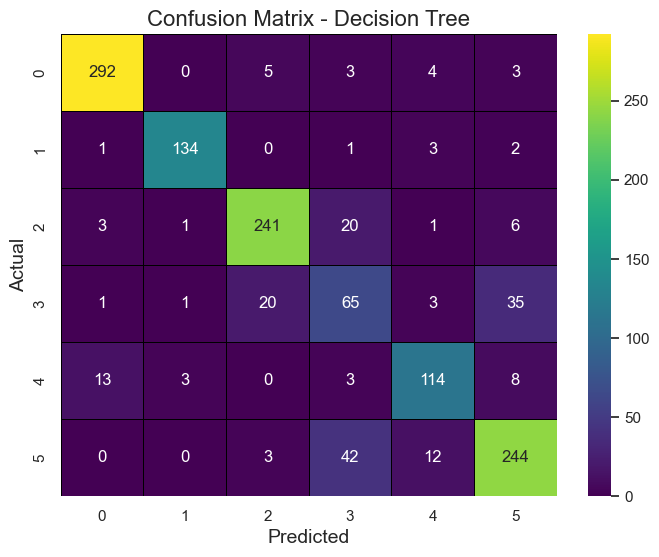

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)    # fitting the model
y_pred_dt = dt.predict(X_test)  # predicting on test set
# fetching confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
# displaying confusion matrix
from matplotlib.colors import LogNorm
plt.figure(figsize=(8,6))
sns.heatmap(
    conf_matrix_dt,
    annot=True,
    fmt='d',
    cmap='viridis',
    linewidths=0.5,
    linecolor='black',
)
plt.title('Confusion Matrix - Decision Tree', fontsize=16)
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.show()


In [12]:
# displaying classification report as styled HTML table
# displaying classification report as styled HTML table
class_report_dict_dt = classification_report(y_test, y_pred_dt, output_dict=True)
class_report_df_dt = pd.DataFrame(class_report_dict_dt).transpose().round(3)

# writing custom CSS to display the table
css = """
<style>
.dataframe { border-collapse: collapse; font-family: Tahoma, sans-serif; background-color: transparent; color: #000; margin: 0; }
table.dataframe { margin: 0 auto; }  /* center the table */
.dataframe thead th { background-color: #3b4cc0; color: #fff; }
.dataframe th, .dataframe td {border: 1px solid #ddd; white-space: nowrap; font-size: 13px; }
.dataframe tbody tr:hover { background-color: #f2f2f2; }
.dataframe tbody tr:nth-child(even) { background-color: #fbfcff; }
div[style*="background-color: #f0f8ff"] { padding: 6px !important; margin: 0 !important; }
</style>
"""


# build the html
html = (
    css
    + "<div style='background-color: #f0f8ff; padding: 10px; border-radius: 5px; "
      "font-family: Tahoma; color: #000000; text-align: center;'>"
    + "<h3>Classification Report</h3>"
    + class_report_df_dt.to_html()
    + "</div>"
)

# Enlarge table: set width, increase font-size and add cell padding via inline styles
html = html.replace('<table ', '<table style="width:90%; font-size:16px; border-collapse:collapse;" ')
html = html.replace('<th>', '<th style="padding:10px;">')
html = html.replace('<td>', '<td style="padding:10px;">')

display(HTML(html))

,precision,recall,f1-score,support
1,0.942,0.951,0.947,307.000
2,0.964,0.950,0.957,141.000
3,0.896,0.886,0.891,272.000
4,0.485,0.520,0.502,125.000
5,0.832,0.809,0.820,141.000
7,0.819,0.811,0.815,301.000
accuracy,0.847,0.847,0.847,0.847
macro avg,0.823,0.821,0.822,1287.000
weighted avg,0.849,0.847,0.848,1287.000


In [13]:
# recording overall accuracy and weighted F1-score
overall_accuracy_dt = class_report_dict_dt['accuracy']
weighted_f1_dt = class_report_dict_dt['weighted avg']['f1-score']
print("Overall Accuracy of Decision Tree:", f"{overall_accuracy_dt:.3f}")
print("Weighted F1-score of Decision Tree:", f"{weighted_f1_dt:.3f}")

Overall Accuracy of Decision Tree: 0.847
Weighted F1-score of Decision Tree: 0.848


#### <em>Dummy Classifier (Prior)</em>

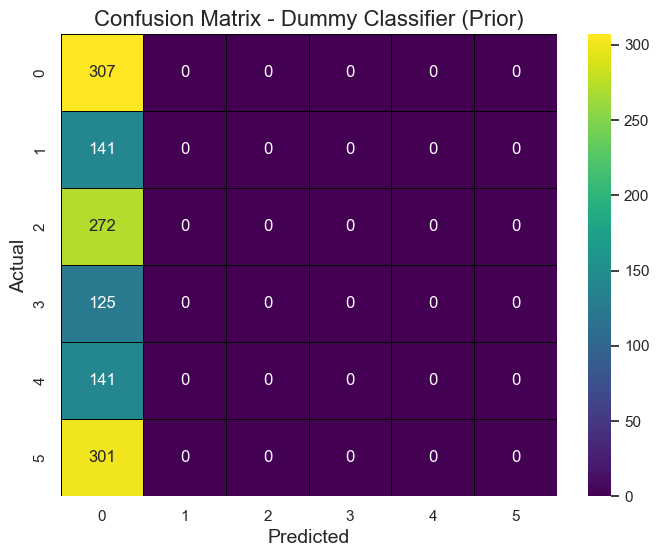

In [14]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='prior')
dummy.fit(X_train, y_train)  # fitting the model
y_pred_dummy = dummy.predict(X_test)  # predicting on test set
# fetching confusion matrix
conf_matrix_dummy = confusion_matrix(y_test, y_pred_dummy)
# displaying confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(
    conf_matrix_dummy,
    annot=True,
    fmt='d',
    cmap='viridis',
    linewidths=0.5,
    linecolor='black',
)
plt.title('Confusion Matrix - Dummy Classifier (Prior)', fontsize=16)
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.show()

<div style='background-color: #ffffff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>
<h3>Explanation of the Dummy Classifier Confusion Matrix</h3>

<h4>What this plot shows:</h4>
<ul>
<li>For <b>every actual class</b>, all predictions are assigned to class <b>0</b> (the most frequent class in the dataset).</li>
<li>Each row has a nonzero count only in the first column, reflecting that the classifier always predicts class 0, regardless of the true label.</li>
<li>This results in high counts along the first column, and zeros elsewhere.</li>
</ul>

<h4>What does this mean?</h4>
<ul>
<li>The Dummy Classifier (prior strategy) ignores input features and always chooses the majority class.</li>
<li>No other class is ever predicted, giving a very poor and uninformed model.</li>
<li>The matrix visually demonstrates why such a classifier is considered a baseline: it does not learn anything meaningful and serves only as a reference to compare with actual model performance.</li>
</ul>

<hr>
<b>In summary:</b><br>
This confusion matrix shows the behavior of a classifier that predicts the most common class for all samples. It helps establish a baseline to evaluate whether more sophisticated models actually learn meaningful patterns.


In [15]:
# displaying the classification report as styled HTML table
class_report_dict_dummy = classification_report(y_test, y_pred_dummy, output_dict=True, zero_division=0)
class_report_df_dummy = pd.DataFrame(class_report_dict_dummy).transpose().round(3)

# writing custom CSS to display the table
css = """
<style>
.dataframe { border-collapse: collapse; font-family: Tahoma, sans-serif; background-color: transparent; color: #000; margin: 0; }
table.dataframe { margin: 0 auto; }  /* center the table */
.dataframe thead th { background-color: #3b4cc0; color: #fff; }
.dataframe th, .dataframe td {border: 1px solid #ddd; white-space: nowrap; font-size: 13px; }
.dataframe tbody tr:hover { background-color: #f2f2f2; }
.dataframe tbody tr:nth-child(even) { background-color: #fbfcff; }
div[style*="background-color: #f0f8ff"] { padding: 6px !important; margin: 0 !important; }
</style>
"""
# build the html
html = (
    css
    + "<div style='background-color: #f0f8ff; padding: 10px; border-radius: 5px; "
      "font-family: Tahoma; color: #000000; text-align: center;'>"
    + "<h3>Classification Report</h3>"
    + class_report_df_dummy.to_html()
    + "</div>"
)
# Enlarge table: set width, increase font-size and add cell padding via inline styles
html = html.replace('<table ', '<table style="width:90%; font-size:16px; border-collapse:collapse;" ')
html = html.replace('<th>', '<th style="padding:10px;">')
html = html.replace('<td>', '<td style="padding:10px;">')
# display the HTML
display(HTML(html))

,precision,recall,f1-score,support
1,0.239,1.000,0.385,307.000
2,0.000,0.000,0.000,141.000
3,0.000,0.000,0.000,272.000
4,0.000,0.000,0.000,125.000
5,0.000,0.000,0.000,141.000
7,0.000,0.000,0.000,301.000
accuracy,0.239,0.239,0.239,0.239
macro avg,0.040,0.167,0.064,1287.000
weighted avg,0.057,0.239,0.092,1287.000


In [16]:
# recording overall accuracy and weighted F1-score
overall_accuracy_dummy = class_report_dict_dummy['accuracy']
weighted_f1_dummy = class_report_dict_dummy['weighted avg']['f1-score']
print("Overall Accuracy of Dummy Classifier (Prior):", f"{overall_accuracy_dummy:.3f}")
print("Weighted F1-score of Dummy Classifier (Prior):", f"{weighted_f1_dummy:.3f}")

Overall Accuracy of Dummy Classifier (Prior): 0.239
Weighted F1-score of Dummy Classifier (Prior): 0.092


#### <em>Logistic Regression Classifier</em>

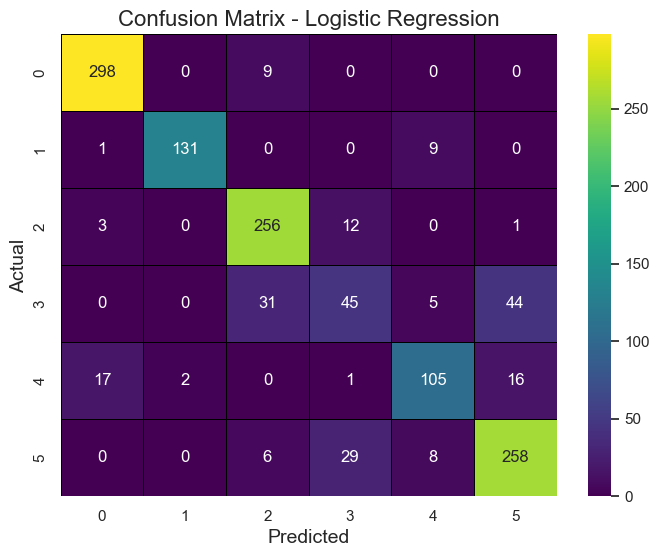

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)    # fitting the model
y_pred_logreg = log_reg.predict(X_test)  # predicting on test set
# fetching confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
# displaying confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(
    conf_matrix_logreg,
    annot=True,
    fmt='d',
    cmap='viridis',
    linewidths=0.5,
    linecolor='black',
)
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.show()

In [18]:
# displaying the classification report as styled HTML table
class_report_dict_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)
class_report_df_logreg = pd.DataFrame(class_report_dict_logreg).transpose().round(3)
# writing custom CSS to display the table
css = """
<style>
.dataframe { border-collapse: collapse; font-family: Tahoma, sans-serif; background-color
: transparent; color: #000; margin: 0; }
table.dataframe { margin: 0 auto; }  /* center the table */
.dataframe thead th { background-color: #3b4cc0; color: #fff; }
.dataframe th, .dataframe td {border: 1px solid #ddd; white-space: nowrap; font-size: 13px; }
.dataframe tbody tr:hover { background-color: #f2f2f2; }
.dataframe tbody tr:nth-child(even) { background-color: #fbfcff; }
div[style*="background-color: #f0f8ff"] { padding: 6px !important; margin: 0 !important; }
</style>
"""
# build the html
html = (
    css
    + "<div style='background-color: #f0f8ff; padding: 10px; border-radius: 5px; "
      "font-family: Tahoma; color: #000000; text-align: center;'>"
    + "<h3>Classification Report</h3>"
    + class_report_df_logreg.to_html()
    + "</div>"
)
# Enlarge table: set width, increase font-size and add cell padding via inline styles
html = html.replace('<table ', '<table style="width:90%; font-size:16px; border-collapse:collapse;" ')
html = html.replace('<th>', '<th style="padding:10px;">')
html = html.replace('<td>', '<td style="padding:10px;">')

# display the HTML
display(HTML(html))

,precision,recall,f1-score,support
1,0.934,0.971,0.952,307.000
2,0.985,0.929,0.956,141.000
3,0.848,0.941,0.892,272.000
4,0.517,0.360,0.425,125.000
5,0.827,0.745,0.784,141.000
7,0.809,0.857,0.832,301.000
accuracy,0.849,0.849,0.849,0.849
macro avg,0.820,0.800,0.807,1287.000
weighted avg,0.840,0.849,0.842,1287.000


In [19]:
# recording overall accuracy and weighted F1-score
overall_accuracy_logreg = class_report_dict_logreg['accuracy']
weighted_f1_logreg = class_report_dict_logreg['weighted avg']['f1-score']
print("Overall Accuracy of Logistic Regression: ", f"{overall_accuracy_logreg:.3f}")
print("Weighted F1-score of Logistic Regression:", f"{weighted_f1_logreg:.3f}")

Overall Accuracy of Logistic Regression:  0.849
Weighted F1-score of Logistic Regression: 0.842


#### <em>Naive Bayes Classifier</em>

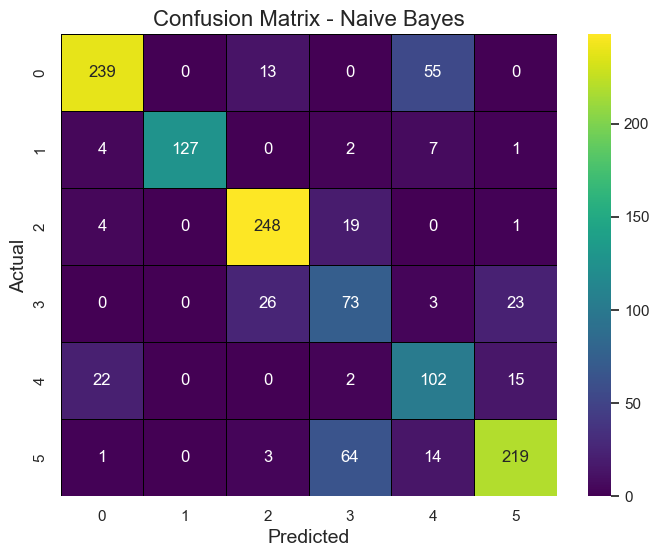

In [20]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)    # fitting the model
y_pred_nb = nb.predict(X_test)  # predicting on test set
# fetching confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
# displaying confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(
    conf_matrix_nb,
    annot=True,
    fmt='d',
    cmap='viridis',
    linewidths=0.5,
    linecolor='black',
)
plt.title('Confusion Matrix - Naive Bayes', fontsize=16)
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.show()

In [21]:
# displaying the classification report as styled HTML table
class_report_dict_nb = classification_report(y_test, y_pred_nb, output_dict=True)
class_report_df_nb = pd.DataFrame(class_report_dict_nb).transpose().round(3)
# writing custom CSS to display the table
css = """
<style>
.dataframe { border-collapse: collapse; font-family: Tahoma, sans-serif; background-color
: transparent; color: #000; margin: 0; }
table.dataframe { margin: 0 auto; }  /* center the table */
.dataframe thead th { background-color: #3b4cc0; color: #fff; }
.dataframe th, .dataframe td {border: 1px solid #ddd; white-space: nowrap; font-size: 13px; }
.dataframe tbody tr:hover { background-color: #f2f2f2; }
.dataframe tbody tr:nth-child(even) { background-color: #fbfcff; }
div[style*="background-color: #f0f8ff"] { padding: 6px !important; margin: 0 !important; }
</style>
"""

# build the html
html = (
    css
    + "<div style='background-color: #f0f8ff; padding: 10px; border-radius: 5px; "
      "font-family: Tahoma; color: #000000; text-align: center;'>"
    + "<h3>Classification Report</h3>"
    + class_report_df_nb.to_html()
    + "</div>"
)
# Enlarge table: set width, increase font-size and add cell padding via inline styles
html = html.replace('<table ', '<table style="width:90%; font-size:16px; border-collapse:collapse;" ')
html = html.replace('<th>', '<th style="padding:10px;">')
html = html.replace('<td>', '<td style="padding:10px;">')
# display the HTML
display(HTML(html))

,precision,recall,f1-score,support
1,0.885,0.779,0.828,307.000
2,1.000,0.901,0.948,141.000
3,0.855,0.912,0.883,272.000
4,0.456,0.584,0.512,125.000
5,0.564,0.723,0.634,141.000
7,0.846,0.728,0.782,301.000
accuracy,0.783,0.783,0.783,0.783
macro avg,0.768,0.771,0.764,1287.000
weighted avg,0.805,0.783,0.790,1287.000


In [22]:
# recording overall accuracy and weighted F1-score
overall_accuracy_nb = class_report_dict_nb['accuracy']
weighted_f1_nb = class_report_dict_nb['weighted avg']['f1-score']
print("Overall Accuracy of Naive Bayes:", f"{overall_accuracy_nb:.3f}")
print("Weighted F1-score of Naive Bayes:", f"{weighted_f1_nb:.3f}")

Overall Accuracy of Naive Bayes: 0.783
Weighted F1-score of Naive Bayes: 0.790


#### <em>Support Vector Classifier (SVC)</em>

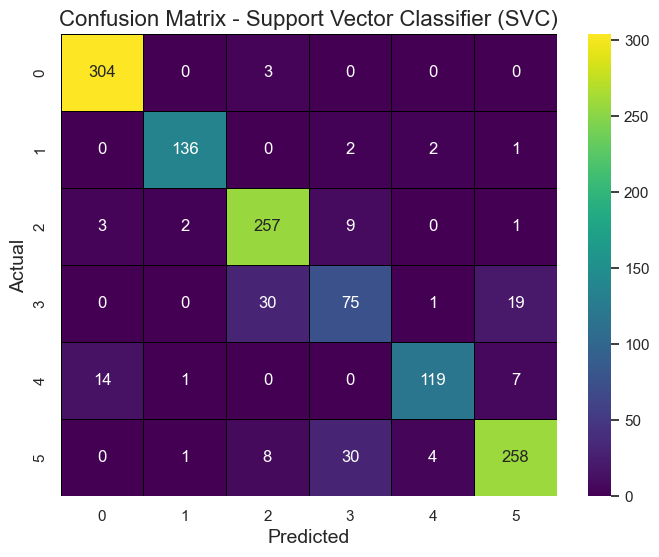

In [23]:
from sklearn.svm import SVC
svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)    # fitting the model
y_pred_svc = svc.predict(X_test)  # predicting on test set
# fetching confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
# displaying confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(
    conf_matrix_svc,
    annot=True,
    fmt='d',
    cmap='viridis',
    linewidths=0.5,
    linecolor='black',
)
plt.title('Confusion Matrix - Support Vector Classifier (SVC)', fontsize=16)
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.show()

In [24]:
# displaying the classification report as styled HTML table
class_report_dict_svc = classification_report(y_test, y_pred_svc, output_dict=True)
class_report_df_svc = pd.DataFrame(class_report_dict_svc).transpose().round(3)

# writing custom CSS to display the table
css = """
<style>
.dataframe { border-collapse: collapse; font-family: Tahoma, sans-serif; background-color: transparent; color: #000; margin: 0; }
table.dataframe { margin: 0 auto; }  /* center the table */
.dataframe thead th { background-color: #3b4cc0; color: #fff; }
.dataframe th, .dataframe td {border: 1px solid #ddd; white-space: nowrap; font-size: 13px; }
.dataframe tbody tr:hover { background-color: #f2f2f2; }
.dataframe tbody tr:nth-child(even) { background-color: #fbfcff; }
div[style*="background-color: #f0f8ff"] { padding: 6px !important; margin: 0 !important; }
</style>
"""
# build the html
html = (
    css
    + "<div style='background-color: #f0f8ff; padding: 10px; border-radius: 5px; "
      "font-family: Tahoma; color: #000000; text-align: center;'>"
    + "<h3>Classification Report</h3>"
    + class_report_df_svc.to_html()
    + "</div>"
)
# Enlarge table: set width, increase font-size and add cell padding via inline styles
html = html.replace('<table ', '<table style="width:90%; font-size:16px; border-collapse:collapse;" ')
html = html.replace('<th>', '<th style="padding:10px;">')
html = html.replace('<td>', '<td style="padding:10px;">')
# display the HTML
display(HTML(html))

,precision,recall,f1-score,support
1,0.947,0.990,0.968,307.000
2,0.971,0.965,0.968,141.000
3,0.862,0.945,0.902,272.000
4,0.647,0.600,0.622,125.000
5,0.944,0.844,0.891,141.000
7,0.902,0.857,0.879,301.000
accuracy,0.893,0.893,0.893,0.893
macro avg,0.879,0.867,0.872,1287.000
weighted avg,0.892,0.893,0.891,1287.000


In [25]:
# recording overall accuracy and weighted F1-score
overall_accuracy_svc = class_report_dict_svc['accuracy']
weighted_f1_svc = class_report_dict_svc['weighted avg']['f1-score']
print("Overall Accuracy of Support Vector Classifier (SVC):", f"{overall_accuracy_svc:.3f}")
print("Weighted F1-score of Support Vector Classifier (SVC):", f"{weighted_f1_svc:.3f}")

Overall Accuracy of Support Vector Classifier (SVC): 0.893
Weighted F1-score of Support Vector Classifier (SVC): 0.891


#### <em>Random Forest Classifier</em>

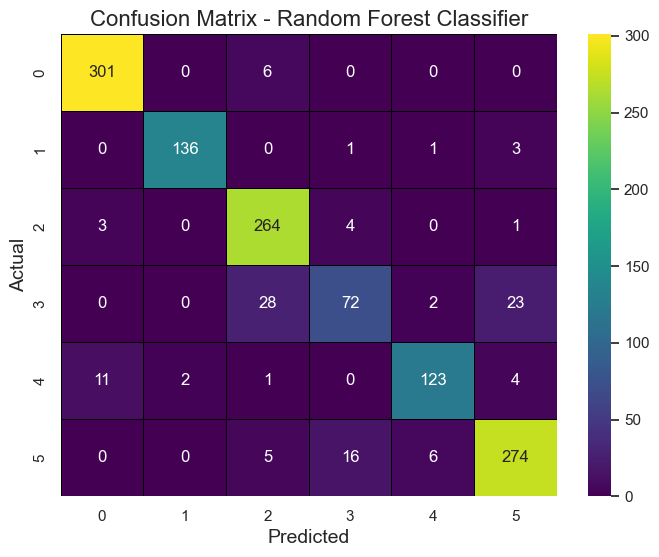

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)    # fitting the model
y_pred_rf = rf.predict(X_test)  # predicting on test set
# fetching confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# displaying confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(
    conf_matrix_rf,
    annot=True,
    fmt='d',
    cmap='viridis',
    linewidths=0.5,
    linecolor='black',
)
plt.title('Confusion Matrix - Random Forest Classifier', fontsize=16)
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.show()


In [27]:
# displaying the classification report as styled HTML table
class_report_dict_rf = classification_report(y_test, y_pred_rf, output_dict=True)
class_report_df_rf = pd.DataFrame(class_report_dict_rf).transpose().round(3)

# writing custom CSS to display the table
css = """
<style>
.dataframe { border-collapse: collapse; font-family: Tahoma, sans-serif; background-color: transparent; color: #000; margin: 0; }
table.dataframe { margin: 0 auto; }  /* center the table */
.dataframe thead th { background-color: #3b4cc0; color: #fff; }
.dataframe th, .dataframe td {border: 1px solid #ddd; white-space: nowrap; font-size: 13px; }
.dataframe tbody tr:hover { background-color: #f2f2f2; }
.dataframe tbody tr:nth-child(even) { background-color: #fbfcff; }
div[style*="background-color: #f0f8ff"] { padding: 6px !important; margin: 0 !important; }
</style>
"""

# build the html
html = (
    css
    + "<div style='background-color: #f0f8ff; padding: 10px; border-radius: 5px; "
      "font-family: Tahoma; color: #000000; text-align: center;'>"
    + "<h3>Classification Report</h3>"
    + class_report_df_rf.to_html()
    + "</div>"
)

# Enlarge table: set width, increase font-size and add cell padding via inline styles
html = html.replace('<table ', '<table style="width:90%; font-size:16px; border-collapse:collapse;" ')
html = html.replace('<th>', '<th style="padding:10px;">')
html = html.replace('<td>', '<td style="padding:10px;">')

# display the HTML
display(HTML(html))

,precision,recall,f1-score,support
1,0.956,0.980,0.968,307.000
2,0.986,0.965,0.975,141.000
3,0.868,0.971,0.917,272.000
4,0.774,0.576,0.661,125.000
5,0.932,0.872,0.901,141.000
7,0.898,0.910,0.904,301.000
accuracy,0.909,0.909,0.909,0.909
macro avg,0.902,0.879,0.888,1287.000
weighted avg,0.907,0.909,0.906,1287.000


In [28]:
# recording overall accuracy and weighted F1-score for Random Forest Classifier
overall_accuracy_rf = class_report_dict_rf['accuracy']
weighted_f1_rf = class_report_dict_rf['weighted avg']['f1-score']
print("Overall Accuracy of Random Forest Classifier:", f"{overall_accuracy_rf:.3f}")
print("Weighted F1-score of Random Forest Classifier:", f"{weighted_f1_rf:.3f}")

Overall Accuracy of Random Forest Classifier: 0.909
Weighted F1-score of Random Forest Classifier: 0.906


#### <em> XGBoost Classifier</em>

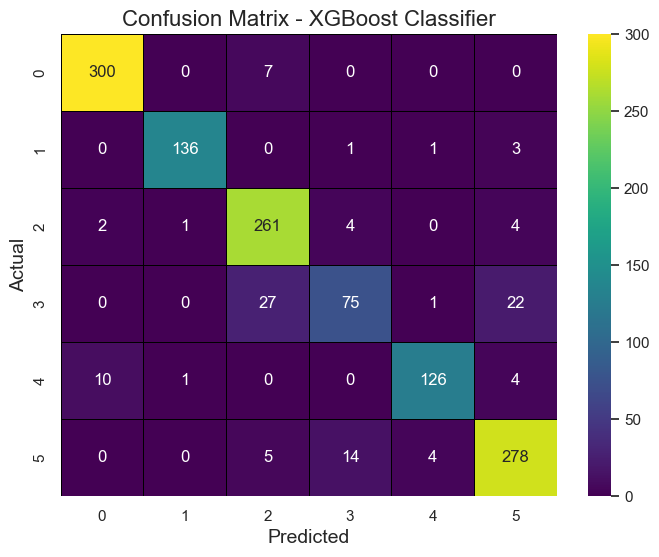

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(np.concatenate([y_train, y_test]))
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

xgb.fit(X_train, y_train_enc)    # fitting the model
y_pred_xgb = xgb.predict(X_test)  # predicting on test set
# fetching confusion matrix
conf_matrix_xgb = confusion_matrix(y_test_enc, y_pred_xgb)
# displaying confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(
    conf_matrix_xgb,
    annot=True,
    fmt='d',
    cmap='viridis',
    linewidths=0.5,
    linecolor='black',
)  
plt.title('Confusion Matrix - XGBoost Classifier', fontsize=16)
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.show()


In [30]:
# display the classification report as styled HTML table
class_report_dict_xgb = classification_report(y_test_enc, y_pred_xgb, output_dict=True)
class_report_df_xgb = pd.DataFrame(class_report_dict_xgb).transpose().round(3)

# writing custom CSS to display the table
css = """
<style>
.dataframe { border-collapse: collapse; font-family: Tahoma, sans-serif; background-color: transparent; color: #000; margin: 0; }
table.dataframe { margin: 0 auto; }  /* center the table */
.dataframe thead th { background-color: #3b4cc0; color: #fff; }
.dataframe th, .dataframe td {border: 1px solid #ddd; white-space: nowrap; font-size: 13px; }
.dataframe tbody tr:hover { background-color: #f2f2f2; }
.dataframe tbody tr:nth-child(even) { background-color: #fbfcff; }
div[style*="background-color: #f0f8ff"] { padding: 6px !important; margin: 0 !important; }
</style>
"""

# build the html
html = (
    css
    + "<div style='background-color: #f0f8ff; padding: 10px; border-radius: 5px; "
      "font-family: Tahoma; color: #000000; text-align: center;'>"
    + "<h3>Classification Report</h3>"
    + class_report_df_xgb.to_html()
    + "</div>"
)
# Enlarge table: set width, increase font-size and add cell padding via inline styles
html = html.replace('<table ', '<table style="width:90%; font-size:16px; border-collapse:collapse;" ')
html = html.replace('<th>', '<th style="padding:10px;">')
html = html.replace('<td>', '<td style="padding:10px;">')

# display the HTML
display(HTML(html))

,precision,recall,f1-score,support
0,0.962,0.977,0.969,307.000
1,0.986,0.965,0.975,141.000
2,0.870,0.960,0.913,272.000
3,0.798,0.600,0.685,125.000
4,0.955,0.894,0.923,141.000
5,0.894,0.924,0.908,301.000
accuracy,0.914,0.914,0.914,0.914
macro avg,0.911,0.886,0.896,1287.000
weighted avg,0.912,0.914,0.911,1287.000


In [31]:
# recording overall accuracy and weighted F1-score for XGBoost Classifier
overall_accuracy_xgb = class_report_dict_xgb['accuracy']
weighted_f1_xgb = class_report_dict_xgb['weighted avg']['f1-score']
print("Overall Accuracy of XGBoost Classifier:", f"{overall_accuracy_xgb:.3f}")
print("Weighted F1-score of XGBoost Classifier:", f"{weighted_f1_xgb:.3f}")

Overall Accuracy of XGBoost Classifier: 0.914
Weighted F1-score of XGBoost Classifier: 0.911


### <strong>Baseline Evaluation of Models</strong>

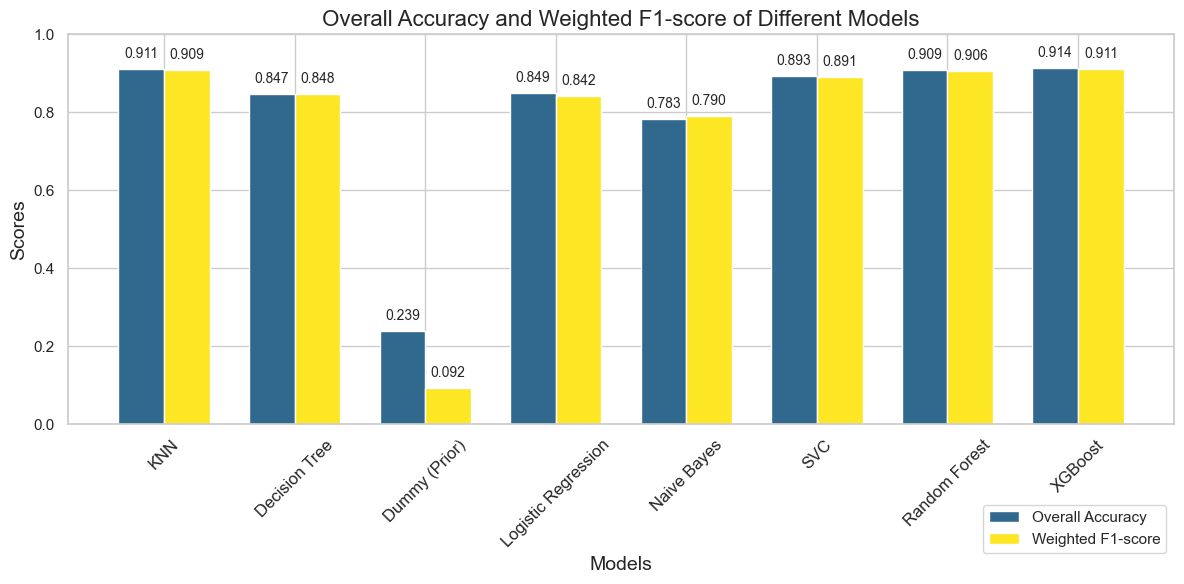

In [32]:
# presenting overall accuracy and weighted f1-score of all models in a bar plot
model_names = ['KNN', 'Decision Tree', 'Dummy (Prior)', 'Logistic Regression', 'Naive Bayes', 'SVC', 'Random Forest', 'XGBoost']
overall_accuracies = [overall_accuracy_knn, overall_accuracy_dt, overall_accuracy_dummy,
                      overall_accuracy_logreg, overall_accuracy_nb, overall_accuracy_svc, overall_accuracy_rf, overall_accuracy_xgb]
weighted_f1_scores = [weighted_f1_knn, weighted_f1_dt, weighted_f1_dummy,
                      weighted_f1_logreg, weighted_f1_nb, weighted_f1_svc, weighted_f1_rf, weighted_f1_xgb]
# setting up the bar plot
x = np.arange(len(model_names))  # the label locations

plt.figure(figsize=(12, 6))
bar_width = 0.35
colors = ['#31688E', '#FDE724'] # colors from viridis colormap
bars1 = plt.bar(x - bar_width/2, overall_accuracies, bar_width, label='Overall Accuracy', color=colors[0])
bars2 = plt.bar(x + bar_width/2, weighted_f1_scores, bar_width, label='Weighted F1-score', color=colors[1])
# adding labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Overall Accuracy and Weighted F1-score of Different Models', fontsize=16)
plt.xticks(x, model_names, rotation=45, fontsize=12)
plt.ylim(0, 1)
plt.legend()
# adding value labels on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02, f'{height:.3f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.legend(
    loc='lower right',              # Anchors legend at bottom left
    bbox_to_anchor=(1, -0.35),     # (x, y) position relative to axes, y < 0 pushes it below chart
    frameon=True
)
plt.show()

<div style='background-color: #ffffff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>
<h3>Summary of Model Performance</h3>
<p>The performance of various classification models has been evaluated using overall accuracy and weighted F1-score metrics. The performance was more or less expected as mentioned in the problem statement. Models like KNN, Decision Tree, Logistic Regression and SVC have similar performance metrics. In order to identify the superior model among them, we need advanced performance evaluation like ROC and PRC curves.</p>
</div>

### <strong>ROC analyis </strong>

<div style='background-color: #ffffff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>
<h3>Multi-Class ROC Calculation: One-vs-Rest (OvR) Approach</h3>

The <b>One-vs-Rest (OvR)</b> approach is a common strategy to extend ROC analysis, which is naturally designed for binary classification, to multi-class classification problems.

<h4>How OvR Works</h4>
<ul>
<li>For a dataset with <b>K classes</b>, the OvR method considers each class separately as the "positive" class. All other classes are grouped together as the "negative" class.</li>
<li>This allows you to compute a binary ROC curve for each class:
    <ul>
        <li>Each instance is treated as either <b>positive</b> (belongs to current class) or <b>negative</b> (belongs to any other class).</li>
        <li>For each class, you use the classifier's predicted probability (score) for that class across all samples.</li>
        <li>You compute the True Positive Rate (TPR, also called recall) and False Positive Rate (FPR) for a range of threshold values applied to these scores.</li>
    </ul>
</li>
</ul>

<h4>Calculating AUC for OvR ROC</h4>
<ul>
<li>For each class, the area under its ROC curve (AUC) quantifies how well the classifier distinguishes that class from all others (i.e., separation power).
<li>AUC values range from 0 to 1:
    <ul>
        <li><b>AUC = 1</b>: perfect separation, classifier always ranks true positives higher than negatives.</li>
        <li><b>AUC = 0.5</b>: random guessing, no separation power.</li>
        <li><b>AUC &lt; 0.5</b>: predicts worse than random (may have learned the wrong signal).</li>
    </ul>
</li>
</ul>

<h4>Macro-Average and Weighted-Average AUC</h4>
<ul>
<li>To summarize performance across all classes, you can take the <b>macro-average AUC</b> (simple mean of per-class AUCs) or <b>weighted-average AUC</b> (weighted by class frequencies).</li>
<li>This gives an overall measure of model discrimination quality across the entire multiclass problem.</li>
</ul>

<h4>Summary</h4>
The OvR approach enables computation of ROC curves and AUC metrics for each class in multi-class classification, facilitating detailed performance assessment and fair comparisons between models by aggregating per-class values.


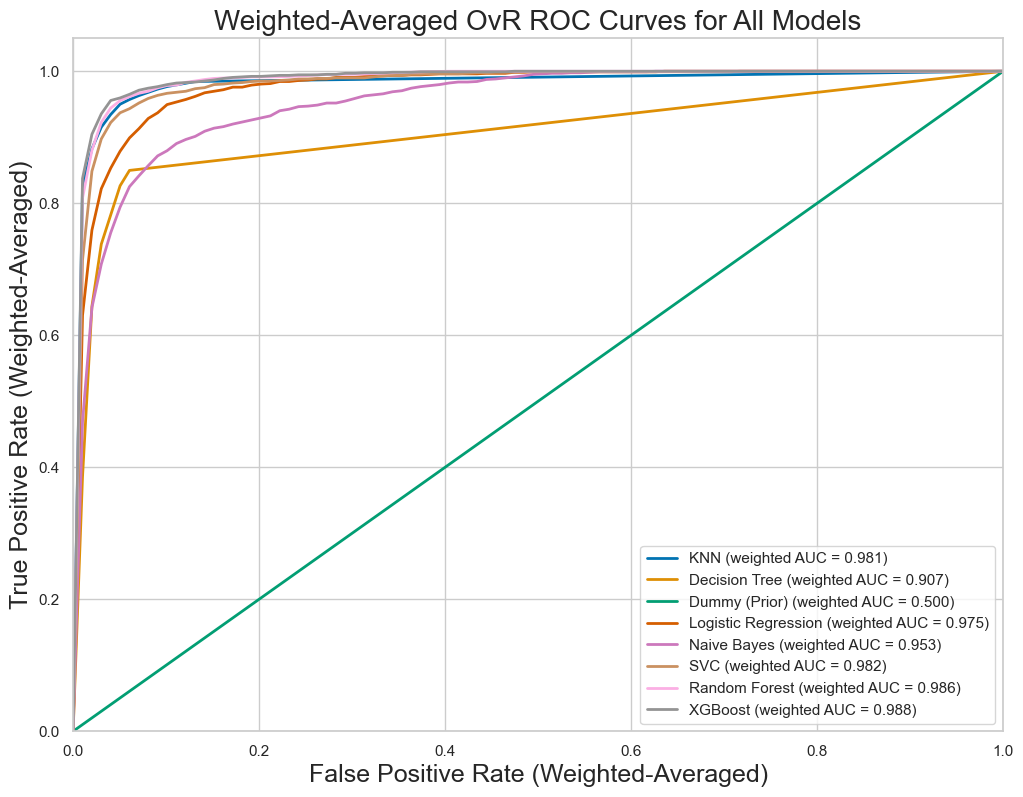

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

models_list = ['KNN', 'Decision Tree', 'Dummy (Prior)', 'Logistic Regression', 'Naive Bayes', 'SVC', 'Random Forest', 'XGBoost']
classes = np.unique(y_test)
y_scores_dict = {
    'KNN': knn.predict_proba(X_test),
    'Decision Tree': dt.predict_proba(X_test),
    'Dummy (Prior)': dummy.predict_proba(X_test),
    'Logistic Regression': log_reg.predict_proba(X_test),
    'Naive Bayes': nb.predict_proba(X_test),
    'SVC': svc.predict_proba(X_test),
    'Random Forest': rf.predict_proba(X_test),
    'XGBoost': xgb.predict_proba(X_test)
}

y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = len(classes)

# Get class supports
class_counts = np.sum(y_test_binarized, axis=0)  # Samples per class
class_weights = class_counts / class_counts.sum()  # Normalized weights
weighted_auc_list = []

plt.figure(figsize=(12,9))
for model_name in models_list:
    y_score = y_scores_dict[model_name]
    fpr = dict()
    tpr = dict()
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        aucs.append(auc(fpr[i], tpr[i]))
        tprs.append(np.interp(mean_fpr, fpr[i], tpr[i]))
        tprs[-1][0] = 0.0
    weighted_tpr = np.average(tprs, axis=0, weights=class_weights)
    weighted_auc = auc(mean_fpr, weighted_tpr)
    weighted_auc_list.append(weighted_auc)
    plt.plot(mean_fpr, weighted_tpr, lw=2, label=f"{model_name} (weighted AUC = {weighted_auc:.3f})")
# plt.plot([0,1],[0,1],'k--', lw=1, label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Weighted-Averaged)', fontsize=18)
plt.ylabel('True Positive Rate (Weighted-Averaged)', fontsize=18)
plt.title('Weighted-Averaged OvR ROC Curves for All Models', fontsize=20)
plt.legend(loc='best')
plt.show()


<div style='background-color: #ffffff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>
<h3>ROC Interpretation</h3>

<h4>Model with Highest Macro-Averaged AUC</h4>
<ul>
<li> The model with the <b>highest macro-averaged AUC</b> is the one that most effectively separates all classes from each other in the OvR setting.</li></br>
<li> This model consistently ranks true positives higher than false positives across every class, demonstrating reliable and well-calibrated decision boundaries for multi-class classification.</li>
</ul>

<h4>Dummy (Prior) Classifier with AUC = 0.5: Meaning and Causes</h4>
<ul>
<li>The <b>Dummy (Prior)</b> model yields a <b>macro-averaged AUC of exactly 0.5</b>. This value corresponds to the theoretical performance for random guessing.</li><br>
<li> The Dummy (Prior) assigns constant prior probabilities based only on class distribution, without considering any input features or learned structure.</li><br>
<li> An AUC of 0.5 shows the model cannot meaningfully distinguish positives from negatives—it guesses by class frequency. For every threshold, the true positive and false positive rates increase at the same rate.</li><br>
<li> <b>Implication:</b><br>
<ul style="margin-left:20px;">  
    <li> This classifier does not help in discriminating between classes and serves only as a baseline.</li><br>
    <li> Any model that achieves an AUC substantially greater than 0.5 is learning useful patterns.</li><br>
    <li> An AUC of 0.5 is expected from models with no predictive power or from classifiers that always predict the same probability for each class, as the Dummy (Prior) does.</li><br>
    </ul>
</div>

<div style='background-color: #ffffff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>
<h3>Drawbacks of ROC Analysis in Imbalanced Datasets</h3>
<ul>
<li> In imbalanced datasets, where one class significantly outnumbers others, ROC curves can present an overly optimistic view of model performance. This is because the false positive rate (FPR) may remain low even when the model misclassifies many instances of the minority class, due to the large number of true negatives.</li>
<li> As a result, a model may achieve a high AUC score while still performing poorly on the minority class, which is often of greater interest in imbalanced scenarios.</li>
<li> Therefore, while ROC analysis is useful, it should be complemented with other metrics, such as Precision-Recall curves, especially in the context of imbalanced datasets.</li>
</ul>
</div>

### <strong>PRC analyis </strong>

<div style='background-color: #ffffff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>

<h3> Why Precision-Recall Curve (PRC) Is Preferred for Imbalanced Classes</h3>

<h4> Focus on Positive Class Performance</h4>
<p>The Precision-Recall Curve (PRC) directly measures performance on the rare or minority class by plotting precision (positive predictive value) and recall (true positive rate) for the positive class only. This makes PRC especially informative when the positive class is much less frequent than the negative class.</p>

<h4> Conceptual Importance </h4>
<p>PRC’s focus on precision means it captures how many predicted positives are actually correct, which is critical when false positives are costly or the minority class is most important. For example, in medical diagnostics or fraud detection, ensuring the correctness of positive predictions is much more significant than overall accuracy.</p>
<p>Overall, the PRC is more suitable than ROC for imbalanced datasets because it provides a direct, sensitive assessment of model effectiveness on the critical positive class, avoiding misleading impressions caused by class prevalence.</p>
</div>


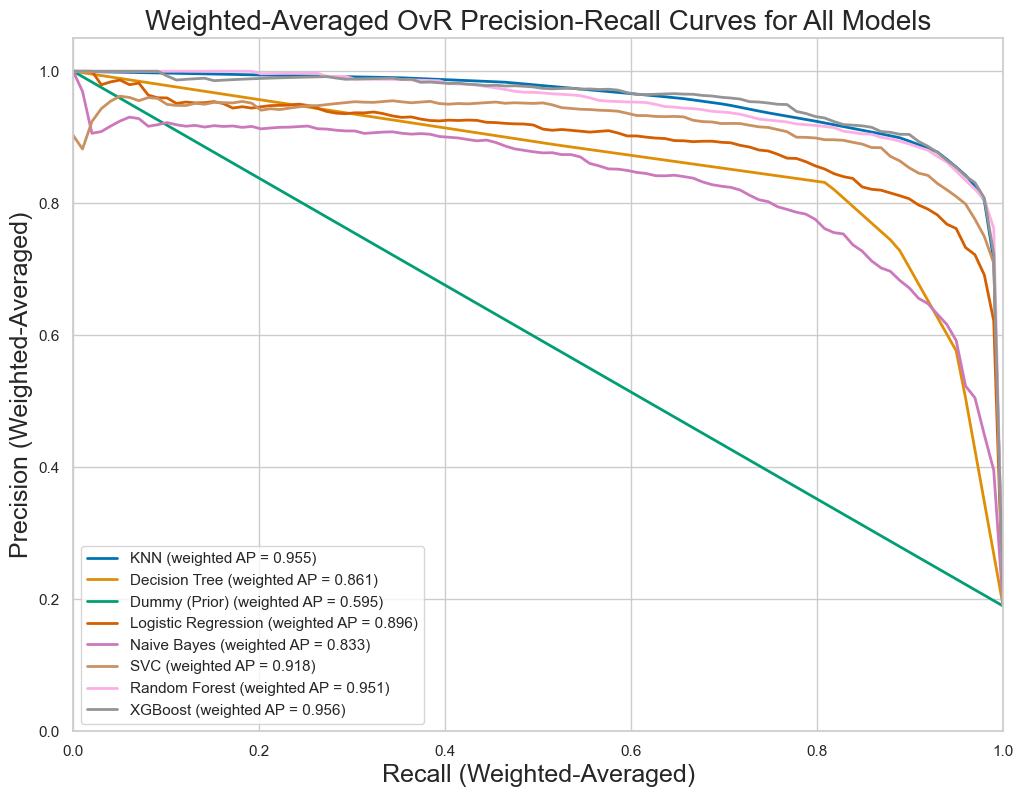

In [34]:
from sklearn.metrics import precision_recall_curve, auc

# Assuming y_test, y_scores_dict, models_list, classes, and class_weights are already defined as in your ROC code
# Initialize list to store weighted-average APs in the same order as models_list
weighted_ap_list = []
plt.figure(figsize=(12,9))
for model_name in models_list:
    y_score = y_scores_dict[model_name]
    precisions = []
    recalls = []
    pr_aucs = []
    mean_recall = np.linspace(0, 1, 100)
    interp_precisions = []
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
        pr_auc = auc(recall, precision)
        pr_aucs.append(pr_auc)
        interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])
        interp_precisions.append(interp_precision)
    weighted_precision = np.average(interp_precisions, axis=0, weights=class_weights)
    weighted_pr_auc = auc(mean_recall, weighted_precision)
    weighted_ap_list.append(weighted_pr_auc)
    plt.plot(mean_recall, weighted_precision, lw=2, label=f"{model_name} (weighted AP = {weighted_pr_auc:.3f})")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall (Weighted-Averaged)', fontsize=18)
plt.ylabel('Precision (Weighted-Averaged)', fontsize=18)
plt.title('Weighted-Averaged OvR Precision-Recall Curves for All Models', fontsize=20)
plt.legend(loc='best')
plt.show()


<div style='background-color: #ffffff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>
<h3>PRC Interpretation</h3>

<h4>Model with the Highest Average Precision (AP)</h4>
Based on the weighted-average OvR Precision-Recall curves shown in the plot, <b>XGBoost</b> achieves the highest Average Precision (AP) across the classes, with a weighted AP of <b>0.956</b>. KNN closely follows (AP = 0.955), but XGBoost is marginally the best overall.

<h4>Behavior of the Worst-Performing Model's PRC</h4>
The <b>Dummy (Prior)</b> model has the lowest AP (0.595). Its PRC curve drops sharply as recall increases, reflecting poor precision at higher recall rates. This happens because the Dummy model predicts based only on class frequencies (always predicting the most common class) and does not learn any features. As recall increases, the model retrieves more actual positives but also admits many false positives. Precision deteriorates rapidly, causing the curve to slope downward.

<ul>
<li><b>Sharp PRC drops for poor models:</b> When a model cannot effectively rank true positives above false positives, increasing recall results in more incorrect predictions. Precision drops quickly, meaning many of the retrieved positives are actually false—especially for weak or non-discriminative models like Dummy. It can be observed how the AP score for dummy model (green line) falls sharply with increasing Recall.</li>
</ul>

<h4>Summary</h4>
<b>Best model:</b> XGBoost (weighted AP = 0.956)  
<b>Worst model:</b> Dummy (weighted AP = 0.595) — its sharp PRC decline as recall increases highlights why precision-recall curves are essential for evaluating models, especially in multi-class and imbalanced scenarios.


### <strong>Conclusion</strong>

In [35]:
# write custom CSS to display the table
css = """
<style>
.dataframe { border-collapse: collapse; font-family: Tahoma, sans-serif; background-color: transparent; color: #000; margin: 0; }
table.dataframe { margin: 0 auto; }  /* center the table */
.dataframe thead th { background-color: #3b4cc0; color: #fff; }
.dataframe th, .dataframe td {border: 1px solid #ddd; white-space: nowrap; font-size: 13px; }
.dataframe tbody tr:hover { background-color: #f2f2f2; }
.dataframe tbody tr:nth-child(even) { background-color: #fbfcff; }
div[style*="background-color: #f0f8ff"] { padding: 6px !important; margin: 0 !important; }
</style>
"""

# concatanating all results into a summary dataframe
results_summary = pd.DataFrame({
    'Model': models_list,
    'Overall Accuracy': overall_accuracies,
    'Weighted F1-score': weighted_f1_scores,
    'AUC scores': weighted_auc_list,
    'Average Precision (AP)': weighted_ap_list
})
# Find best model names (for each metric)
best_acc_model = results_summary.loc[results_summary['Overall Accuracy'].idxmax(), 'Model']
best_f1_model = results_summary.loc[results_summary['Weighted F1-score'].idxmax(), 'Model']
best_auc_model = results_summary.loc[results_summary['AUC scores'].idxmax(), 'Model']
best_ap_model = results_summary.loc[results_summary['Average Precision (AP)'].idxmax(), 'Model']

best_row = {
    'Model': 'Best model',
    'Overall Accuracy': best_acc_model,
    'Weighted F1-score': best_f1_model,
    'AUC scores': best_auc_model,
    'Average Precision (AP)': best_ap_model
}

# Concatenate row with consistent columns
results_summary = pd.concat(
    [results_summary, pd.DataFrame([best_row])],
    ignore_index=True
)

# round only numeric rows (except best row)
for col in ['Overall Accuracy', 'Weighted F1-score', 'AUC scores', 'Average Precision (AP)']:
    # Only round floats (not for 'Best model' string values)
    results_summary.loc[results_summary['Model'] != 'Best model', col] = \
        results_summary.loc[results_summary['Model'] != 'Best model', col].astype(float).round(3)
    
# build the html
html = (
    css
    + "<div style='background-color: #f0f8ff; padding: 10px; border-radius: 5px; "
      "font-family: Tahoma; color: #000000; text-align: center;'>"
    + "<h3>Model Performance Summary</h3>"
    + results_summary.to_html(index=False)
    + "</div>"
)
# Enlarge table: set width, increase font-size and add cell padding via inline styles
html = html.replace('<table ', '<table style="width:90%; font-size:16px; border-collapse:collapse;" ')
html = html.replace('<th>', '<th style="padding:10px;">')
html = html.replace('<td>', '<td style="padding:10px;">')

# display the HTML
display(HTML(html))

Model,Overall Accuracy,Weighted F1-score,AUC scores,Average Precision (AP)
KNN,0.911,0.909,0.981,0.955
Decision Tree,0.847,0.848,0.907,0.861
Dummy (Prior),0.239,0.092,0.5,0.595
Logistic Regression,0.849,0.842,0.975,0.896
Naive Bayes,0.783,0.79,0.953,0.833
SVC,0.893,0.891,0.982,0.918
Random Forest,0.909,0.906,0.986,0.951
XGBoost,0.914,0.911,0.988,0.956
Best model,XGBoost,XGBoost,XGBoost,XGBoost


<div style='background-color: #ffffff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>
<h2>Recommended Classifier: XGBoost <h2>

<h4>Top Performance Across Multiple Metrics</h4>
Based on the summary table, <b>XGBoost</b> consistently achieves the best results across all major evaluation metrics:
<ul>
  <li><b>Overall Accuracy:</b> XGBoost demonstrates the highest fraction of correctly classified samples.</li>
  <li><b>Weighted F1-score:</b> It excels in balancing precision and recall for each class, showing robust performance even in the presence of class imbalance.</li>
  <li><b>AUC scores:</b> XGBoost provides the greatest ability to discriminate between classes, as measured by area under the ROC curve.</li>
  <li><b>Average Precision (AP):</b> It delivers superior precision-recall trade-offs, ensuring that predicted positives are highly accurate across all classes.</li>
</ul>

<h4>Why Is XGBoost So Strong?</h4>
<ul>
  <li><b>Advanced Ensemble Technique:</b> XGBoost uses gradient-boosted decision trees, combining multiple weak models to form a highly accurate strong classifier.</li>
  <li><b>Handles Complexity and Non-Linearity:</b> Its tree-based structure efficiently models complex relationships and interactions within your data.</li>
  <li><b>Robust to Class Imbalance:</b> It assigns optimal weights during training to all classes, maintaining high precision and recall even when some classes are rare.</li>
  <li><b>Regularization Features:</b> Built-in mechanisms help avoid overfitting, ensuring stable performance on unseen data.</li>
  <li><b>Scalable and Efficient:</b> XGBoost is optimized for speed and resource usage, making it practical for large datasets and real-world applications.</li>
</ul>

<h4>Summary</h4>
Given its dominance in accuracy, F1-score, ROC-AUC, and AP, <b>XGBoost</b> is the best overall classifier for your dataset. Its advanced ensemble algorithms, robustness to imbalance, and consistently high scores across all evaluation criteria make it an outstanding choice for multi-class classification problems.


### <strong>Appendix: A Bad Model Example</strong>

<div style='background-color: #ffffff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>
<h3>Dummy (Prior) Classifier: A Poor Model Example</h3>
The Dummy (Prior) classifier serves as a baseline model that makes predictions based solely on the class distribution in the training data, without considering any input features. It always predicts the most frequent class for all instances. This results in very poor performance, as it fails to learn any meaningful patterns from the data. The confusion matrix and evaluation metrics clearly illustrate its inadequacy compared to more sophisticated models.

<h3>Can there be a worse model than Dummy (Prior)?</h3>
In practice, the Dummy (Prior) classifier represents one of the simplest and least effective modeling approaches. However, it is theoretically possible to construct models that perform even worse, such as those that consistently misclassify instances or predict the least frequent class. Such models would yield lower accuracy and F1-scores than the Dummy (Prior) classifier, which at least captures the majority class distribution. Let us consider a hypothetical <b>Anti-Dummy</b> classifier that always predicts the least frequent class. Let us see how this model would perform on our dataset:
</div>

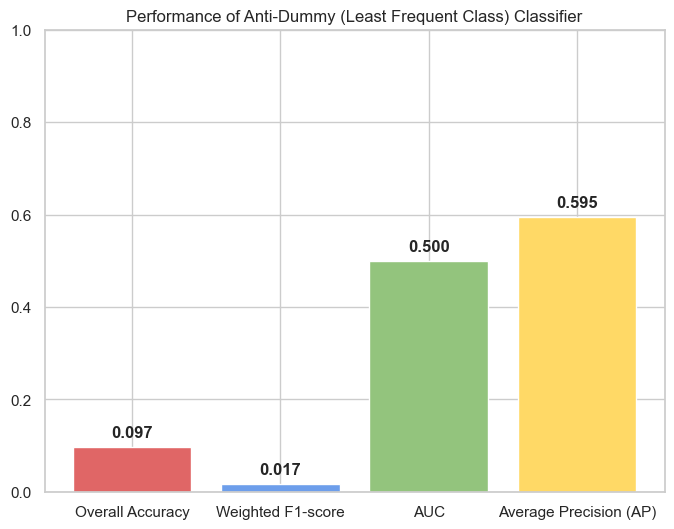

In [36]:
# building the anti-dummy classifier

# importing evalueation metrics
from sklearn.metrics import accuracy_score, f1_score, roc_curve, precision_recall_curve, auc

# Find the least frequent class in y_test
unique, counts = np.unique(y_test, return_counts=True)
least_freq_class = unique[np.argmin(counts)]

# "Anti-Dummy" always predicts the least frequent class
y_pred_antidummy = np.full_like(y_test, fill_value=least_freq_class)

# Overall accuracy
antidummy_acc = accuracy_score(y_test, y_pred_antidummy)

# Weighted F1-score
antidummy_f1 = f1_score(y_test, y_pred_antidummy, average='weighted')

# For ROC and AP: simulate prediction probabilities = 1 for least freq class, 0 for others
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = len(classes)
# Predicted scores: 1 for least frequent class, 0 otherwise
y_score_antidummy = np.zeros((len(y_test), n_classes))
y_score_antidummy[:, np.where(classes == least_freq_class)[0][0]] = 1

# Weighted-average ROC-AUC
mean_fpr = np.linspace(0, 1, 100)
tprs = []
class_counts = np.sum(y_test_bin, axis=0)
class_weights = class_counts / class_counts.sum()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_antidummy[:, i])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
w_tpr = np.average(tprs, axis=0, weights=class_weights)
antidummy_auc = auc(mean_fpr, w_tpr)

# Weighted-average PR AUC
mean_recall = np.linspace(0, 1, 100)
precisions = []
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score_antidummy[:, i])
    interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])
    precisions.append(interp_precision)
w_precision = np.average(precisions, axis=0, weights=class_weights)
antidummy_ap = auc(mean_recall, w_precision)

# Bar plot
metrics = ['Overall Accuracy', 'Weighted F1-score', 'AUC', 'Average Precision (AP)']
values = [antidummy_acc, antidummy_f1, antidummy_auc, antidummy_ap]

plt.figure(figsize=(8,6))
plt.bar(metrics, values, color=['#e06666','#6d9eeb','#93c47d','#ffd966'])
plt.ylim(0, 1.0)
plt.title('Performance of Anti-Dummy (Least Frequent Class) Classifier')
for i, v in enumerate(values):
    plt.text(i, v+0.02, f"{v:.3f}", ha='center', fontweight='bold')
plt.show()


<div style='background-color: #ffffff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>
<p>The Anti-Dummy classifier would predict the least frequent class for all instances, leading to extremely poor performance metrics. For example, if the least frequent class has very few instances, the model would fail to correctly classify any of the other classes, resulting in a confusion matrix with high misclassification rates. The accuracy would be significantly lower than that of the Dummy (Prior) classifier, and the F1-score would also be adversely affected due to the lack of true positive predictions. This illustrates that while the Dummy (Prior) classifier is a poor model, it is possible to conceive of even worse models that perform below this baseline.</p>
<p>However, even this Anti-Dummy model has an AUC of 0.5, meaning it performs no better than random guessing in terms of ranking positive instances higher than negative ones. This highlights that while the Anti-Dummy model is worse in terms of accuracy and F1-score, it still is about as good as random guessing. <em>What about a model that is worse than that?</em></p>
</div>

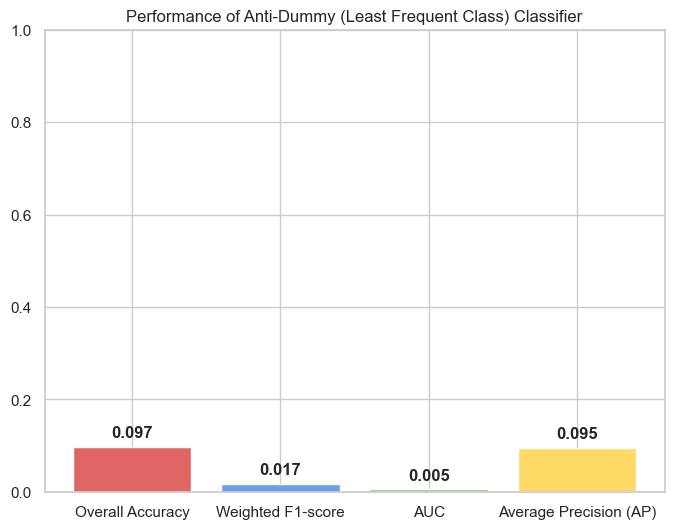

In [37]:
# Find the least frequent class in y_test
unique, counts = np.unique(y_test, return_counts=True)
least_freq_class = unique[np.argmin(counts)]

# "Anti-Dummy" always predicts the least frequent class
y_pred_antidummy = np.full_like(y_test, fill_value=least_freq_class)

# Overall accuracy
antidummy_acc = accuracy_score(y_test, y_pred_antidummy)

# Weighted F1-score
antidummy_f1 = f1_score(y_test, y_pred_antidummy, average='weighted')

# For ROC and AP: INVERTED prediction scores
# To get AUC < 0.5, we assign HIGH scores to WRONG classes
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = len(classes)

# Create inverted scores: give 1.0 to all classes EXCEPT the true class, 0.0 to true class
y_score_antidummy = np.ones((len(y_test), n_classes))
for i, y_true_val in enumerate(y_test):
    true_class_idx = np.where(classes == y_true_val)[0][0]
    y_score_antidummy[i, true_class_idx] = 0.0  # Give lowest score to true class

# Weighted-average ROC-AUC
mean_fpr = np.linspace(0, 1, 100)
tprs = []
class_counts = np.sum(y_test_bin, axis=0)
class_weights = class_counts / class_counts.sum()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_antidummy[:, i])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
w_tpr = np.average(tprs, axis=0, weights=class_weights)
antidummy_auc = auc(mean_fpr, w_tpr)

# Weighted-average PR AUC
mean_recall = np.linspace(0, 1, 100)
precisions = []
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score_antidummy[:, i])
    interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])
    precisions.append(interp_precision)
w_precision = np.average(precisions, axis=0, weights=class_weights)
antidummy_ap = auc(mean_recall, w_precision)

# Bar plot
metrics = ['Overall Accuracy', 'Weighted F1-score', 'AUC', 'Average Precision (AP)']
values = [antidummy_acc, antidummy_f1, antidummy_auc, antidummy_ap]

plt.figure(figsize=(8,6))
plt.bar(metrics, values, color=['#e06666','#6d9eeb','#93c47d','#ffd966'])
plt.ylim(0, 1.0)
plt.title('Performance of Anti-Dummy (Least Frequent Class) Classifier')
for i, v in enumerate(values):
    plt.text(i, v+0.02, f"{v:.3f}", ha='center', fontweight='bold')
plt.show()


<div style='background-color: #ffffff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>
<h3>Why Does the Anti-Dummy Classifier Have an AUC of 0.005?</h3>

<h4>Systematic Misranking of True Positives</h4>
The anti-dummy classifier deliberately assigns the lowest possible score (probability) to the true class for each sample, while giving the highest score to all incorrect classes. As a result, when calculating the Receiver Operating Characteristic (ROC) curve for each class in a one-vs-rest setting, the model consistently ranks false positives above true positives.

<h4>Interpretation of Extremely Low AUC</h4>
An AUC of 0.005 means the model almost never ranks actual positives above negatives—the ROC curve lies far below the diagonal. It essentially predicts the "wrong" signal for every case, so if you choose any threshold, you are far more likely to pick a false positive than a true positive. The anti-dummy classifier is worse than random guessing, as it uses information to consistently misclassify.



<div style='background-color: #ffffff; padding: 10px; border-radius: 5px; font-family: Tahoma; color: #000000; text-align: left;'>
<h3>Lessons from the Anti-Dummy Model Experiment</h3>
<ul>
  <li>
    <b>Importance of Baseline Models:</b>
    Building a deliberately poor model—like the anti-dummy, which systematically assigns the lowest scores to true classes—shows why baseline classifiers are essential. They define what "random" or "uninformed" performance looks like, making it easier to judge whether a real model is truly learning meaningful patterns.
  </li>
  <br>
  <li>
    <b>Proper Use of Evaluation Metrics:</b>
    The anti-dummy model demonstrates how metrics such as AUC can capture not just random performance (AUC ≈ 0.5), but also systematic misclassification (AUC < 0.5). This highlights the value of robust metrics to expose models that might perform worse than random chance.
  </li>
  <br>
  <li>
    <b>Model Construction Risks:</b>
    While not practically useful, this model illustrates what occurs when a system is optimized incorrectly (learning the "opposite" signal). In real scenarios, careless data preprocessing or label inversion could lead to similar issues. 
  </li>
  <br>
  <li>
    <b>Summary:</b>
    Scrutinizing such "bad" models ensures our modeling practices are robust, interpretable, and grounded in reality:
    <ul style="margin-left:20px;">
      <li>Always compare all models to a baseline—good and bad—to understand true value-added.</li>
      <br>
      <li>Observe how evaluation metrics (AUC, F1, AP) behave across the spectrum from ideal to misleading predictions.</li>
      <br>
      <li><b>AUC is especially robust:</b> It not only detects random guessing, but also reliably flags models that systematically misclassify by producing scores below 0.5. This property makes AUC a powerful sanity check for ranking quality and helps prevent unintended model inversion or signal flip.</li><br>
      <li>Validate models carefully to catch systematic errors that might invert or corrupt predictive signals.</li>
      <br>
    </ul>
  </li>
</ul>
</div>


<h1 style="font-family: 'Papyrus', cursive; font-size: 44px; color: #3b4cc0; text-align: center; margin-top: 30px; background-color: #FFD700; padding: 10px; border-radius: 5px;">
This concludes the analysis, ADIEU!
</h1>
